## Detección de Anomalías de concentración de gases en Chernobyl

## Análisis Explotario de Datos (EDA)

### Librerías

Numpy - permite una generación y manejo de datos extremadamente rápido.
Pandas - proporciona herramientas que permiten: leer y escribir datos en diferentes formatos. 
Matplotlib - permite crear y personalizar los tipos de gráficos más comunes.
Seaborn - es una librería de visualización de datos para Python desarrollada sobre matplotlib.


Pandas - proporciona herramientas que permiten: leer y escribir datos en diferentes formatos. 

In [29]:
# Importación de Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Lectura de datos

Este conjunto de datos presenta la concentración de yodo-131 (I-131), cesio-134 (Cs-134) y cesio-137 (radiocesio, Cs-137) como partículas de anaerosol que se midieron en una ubicación y fecha específicas.
En cada línea, se da la siguiente información:

- país

- código de país

- nombre de la localidad

- latitud (grados.centésimas de grados)

- longitud (grados.centésimas de grados)

- fecha (año/mes/día)

- hora de finalización del muestreo (horas:minutos)

- duración (horas.minutos)

- Concentración de I-131 en Bq/m3 (partículas de aerosol)

- Concentración de Cs-134 en Bq/m3 (partículas de aerosol)

- Concentración de Cs-137 en Bq/m3 (partículas de aerosol)

In [3]:
df_train = pd.read_csv('/work/CHERNAIR.csv')
df_test = pd.read_csv('/work/CHERNAIR.csv')
pd.options.display.float_format = '{:,.2f}'.format
print(df_train.shape)
df_train.info()

(2051, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PAYS             2051 non-null   object 
 1   Code             2051 non-null   int64  
 2   Ville            2051 non-null   object 
 3   X                2051 non-null   float64
 4   Y                2051 non-null   float64
 5   Date             2051 non-null   object 
 6   End of sampling  2051 non-null   object 
 7   Duration(h.min)  2051 non-null   float64
 8   I 131 (Bq/m3)    2031 non-null   object 
 9   Cs 134 (Bq/m3)   1897 non-null   object 
 10  Cs 137 (Bq/m3)   1571 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 176.4+ KB


Lo primero que hicimos fue visualizar la cantidad de registros que tenemos, y cuales son los parámetros en nuestro data set (las columnas).

Observando los datos, se aprecia que todas las columnas, a excepción de las referentes a la concentración de Cesio 134 y 137 cuentan con toda la información completa, adelante se manejará ese tema de datos nulos.

A continuación, veremos una parte de los datos.

In [5]:
df_train.head(10)

,PAYS,Code,Ville,X,Y,Date,End of sampling,Duration(h.min),I 131 (Bq/m3),Cs 134 (Bq/m3),Cs 137 (Bq/m3)
0,SE,1,RISOE,12.07,55.70,86/04/27,24:00:00,24.00,1,0,0.24
1,SE,1,RISOE,12.07,55.70,86/04/28,24:00:00,24.00,0.0046,0.00054,0.00098
2,SE,1,RISOE,12.07,55.70,86/04/29,12:00,12.00,0.0147,0.0043,0.0074
3,SE,1,RISOE,12.07,55.70,86/04/29,24:00:00,12.00,0.00061,0,0.00009
4,SE,1,RISOE,12.07,55.70,86/04/30,24:00:00,24.00,0.00075,0.0001,0.00028
5,SE,1,RISOE,12.07,55.70,86/05/01,24:00:00,24.00,0.00053,0,0.0002
6,SE,1,RISOE,12.07,55.70,86/05/02,24:00:00,24.00,0.0176,0,0.00022
7,SE,1,RISOE,12.07,55.70,86/05/03,24:00:00,24.00,0.2239,0.00212,0.00356
8,SE,1,RISOE,12.07,55.70,86/05/04,12:00,12.00,0.41,0.0142,0.0227
9,SE,1,RISOE,12.07,55.70,86/05/04,24:00:00,12.00,0.264303,0.014342,0.023966


In [6]:
df_train.tail(10)

,PAYS,Code,Ville,X,Y,Date,End of sampling,Duration(h.min),I 131 (Bq/m3),Cs 134 (Bq/m3),Cs 137 (Bq/m3)
2041,HU,24,BUDAPEST,19.10,47.50,86/05/02,8:00,24.00,4.1,0.8,1.4
2042,HU,24,BUDAPEST,19.10,47.50,86/05/03,8:00,24.00,0.75,0.13,0.26
2043,HU,24,BUDAPEST,19.10,47.50,86/05/04,8:00,24.00,1.6,0.34,0.62
2044,HU,24,BUDAPEST,19.10,47.50,86/05/05,8:00,24.00,0.42,0.05,0.09
2045,HU,24,BUDAPEST,19.10,47.50,86/05/06,8:00,24.00,0.44,0.056,0.1
2046,HU,24,BUDAPEST,19.10,47.50,86/05/07,8:00,24.00,3.7,0.58,1.2
2047,HU,24,BUDAPEST,19.10,47.50,86/05/08,8:00,24.00,2.2,0.33,0.69
2048,HU,24,BUDAPEST,19.10,47.50,86/05/09,8:00,24.00,0.75,0.14,0.29
2049,HU,24,BUDAPEST,19.10,47.50,86/05/10,8:00,24.00,0.054,0.006,0.009
2050,HU,24,BUDAPEST,19.10,47.50,86/05/11,8:00,24.00,0.051,0.006,0.01


Una vez vista la información, obtendremos algunas estadísticas dadas por la función describe de la librería pandas.

In [28]:
df_train.describe(include='all').fillna('-')

,PAYS,Code,Ville,X,Y,Date,End of sampling,Duration(h.min),I 131 (Bq/m3),Cs 134 (Bq/m3),Cs 137 (Bq/m3)
count,2051,"2,051.00",2051,"2,051.00","2,051.00",2051,2051,"2,051.00",2031,1897,1571
unique,16,-,95,-,-,37,370,-,1037,744,780
top,IT,-,ISPRA,-,-,86/05/02,9:00,-,0,0,0
freq,303,-,101,-,-,190,425,-,274,527,144
mean,-,10.34,-,11.96,47.54,-,-,20.81,-,-,-
std,-,7.50,-,11.30,11.40,-,-,41.35,-,-,-
min,-,1.00,-,-6.28,0.00,-,-,0.20,-,-,-
25%,-,3.00,-,5.18,45.80,-,-,6.00,-,-,-
50%,-,8.00,-,9.80,48.46,-,-,24.00,-,-,-
75%,-,14.00,-,14.50,52.76,-,-,24.00,-,-,-


### Limpieza de Datos

Debido a los datos nulos, las columnas de los gases se encuentran como tipo object, por lo que las tansformaremos a numéricos para poder obtener los estadísticos y gráficas.

In [58]:
df_train['I 131 (Bq/m3)'] = pd.to_numeric(df_train['I 131 (Bq/m3)'], errors='coerce')
df_train['Cs 134 (Bq/m3)'] = pd.to_numeric(df_train['Cs 134 (Bq/m3)'], errors='coerce')
df_train['Cs 137 (Bq/m3)'] = pd.to_numeric(df_train['Cs 137 (Bq/m3)'], errors='coerce')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PAYS             2051 non-null   object 
 1   Code             2051 non-null   int64  
 2   Ville            2051 non-null   object 
 3   X                2051 non-null   float64
 4   Y                2051 non-null   float64
 5   Date             2051 non-null   object 
 6   End of sampling  2051 non-null   object 
 7   Duration(h.min)  2051 non-null   float64
 8   I 131 (Bq/m3)    2009 non-null   float64
 9   Cs 134 (Bq/m3)   1801 non-null   float64
 10  Cs 137 (Bq/m3)   1506 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 176.4+ KB


Hecho esto, nuevamente buscaremos los estadísticos dados por la función describe.

In [59]:
df_train.describe(include='all').fillna('-')

,PAYS,Code,Ville,X,Y,Date,End of sampling,Duration(h.min),I 131 (Bq/m3),Cs 134 (Bq/m3),Cs 137 (Bq/m3)
count,2051,"2,051.00",2051,"2,051.00","2,051.00",2051,2051,"2,051.00","2,009.00","1,801.00","1,506.00"
unique,16,-,95,-,-,37,370,-,-,-,-
top,IT,-,ISPRA,-,-,86/05/02,9:00,-,-,-,-
freq,303,-,101,-,-,190,425,-,-,-,-
mean,-,10.34,-,11.96,47.54,-,-,20.81,1.75,0.25,0.48
std,-,7.50,-,11.30,11.40,-,-,41.35,5.04,0.75,1.04
min,-,1.00,-,-6.28,0.00,-,-,0.20,0.00,0.00,0.00
25%,-,3.00,-,5.18,45.80,-,-,6.00,0.00,0.00,0.00
50%,-,8.00,-,9.80,48.46,-,-,24.00,0.06,0.00,0.02
75%,-,14.00,-,14.50,52.76,-,-,24.00,1.14,0.17,0.48


Con los datos en el formato deseado, y a través de la función plot de pandas, podemos el comportamiento de los gases.

<AxesSubplot: >

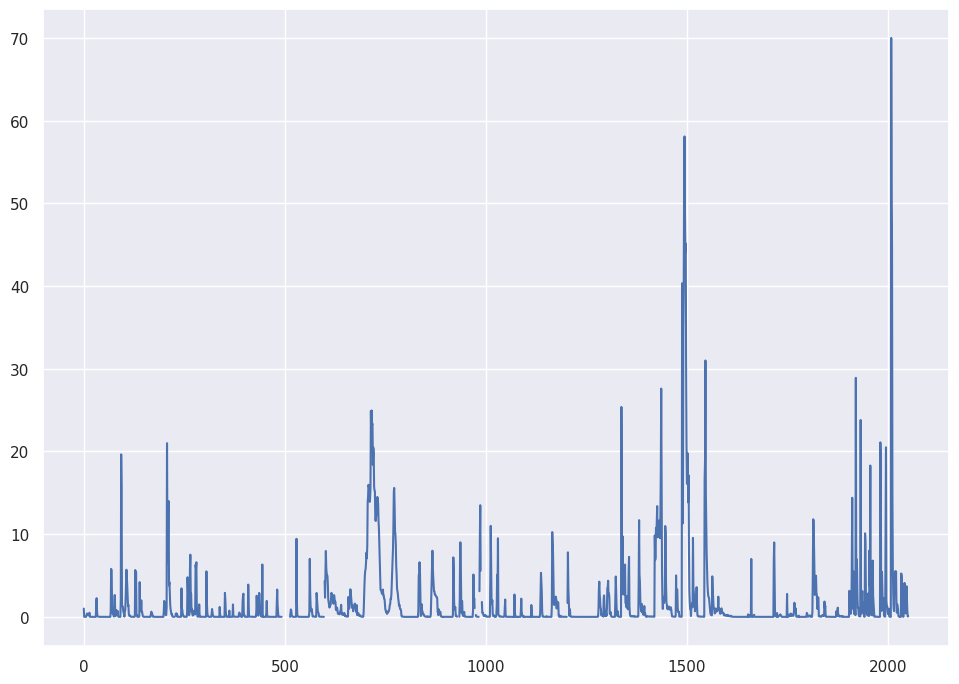

In [64]:
df_train['I 131 (Bq/m3)'].plot()

<AxesSubplot: >

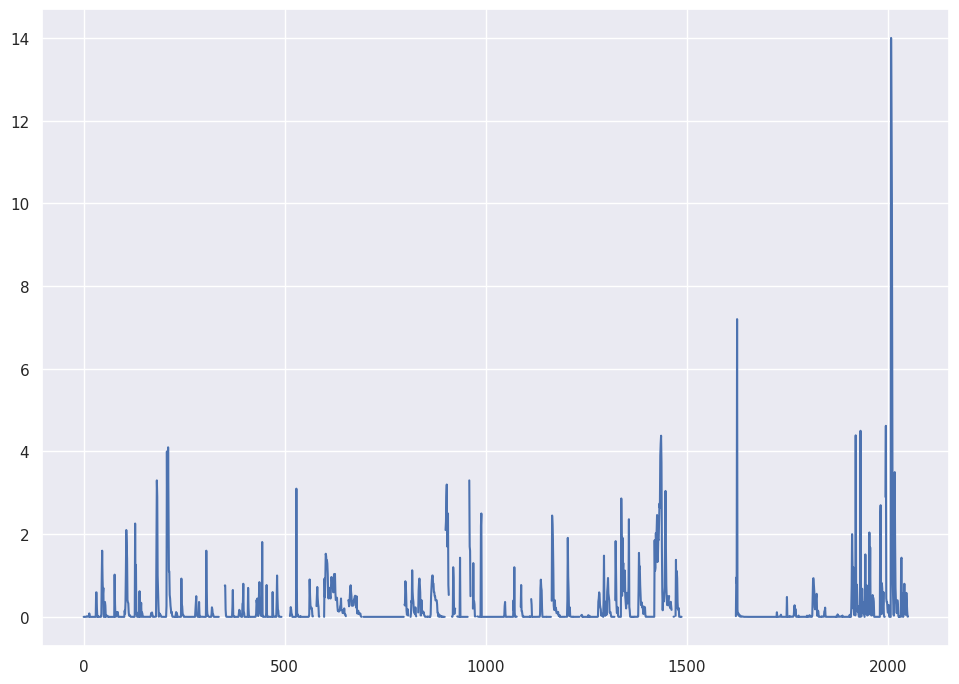

In [65]:
df_train['Cs 134 (Bq/m3)'].plot()

<AxesSubplot: >

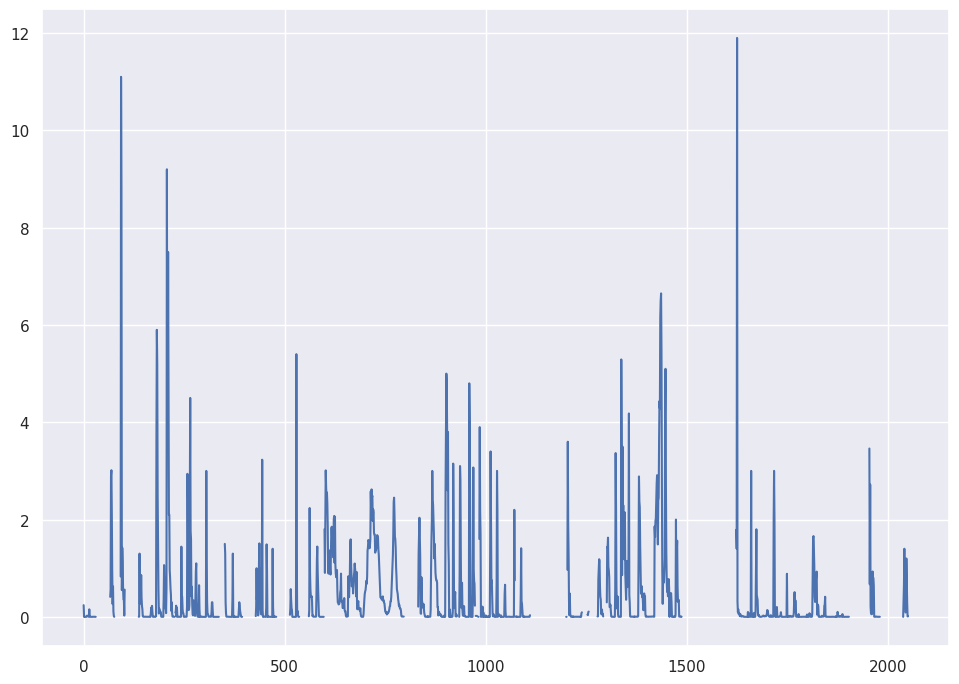

In [66]:
df_train['Cs 137 (Bq/m3)'].plot()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1e8030e7-ebf6-435e-a49a-e2347c6753b8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>